In [75]:
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import preprocessing
sns.set(color_codes=True) 
%matplotlib inline

# Q1) Columns and description

In [76]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [77]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [79]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [80]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [81]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [83]:
df= df.drop(['ZIP Code','ID'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [82]:
df.Family = df.Family.astype('object')
df['Securities Account']  = df['Securities Account'].astype('object')
df['CD Account'] = df['CD Account'].astype('object')
df['Online'] = df['Online'].astype('object')
df['CreditCard'] = df['CreditCard'].astype('object')
df.Education = df.Education.astype('object')

In [84]:
df['Education'] = df['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})

In [85]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

# Q2. Univariate Analysis

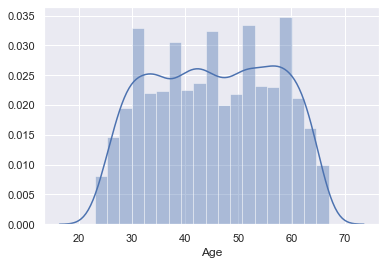

In [37]:
sns.distplot(df['Age'])

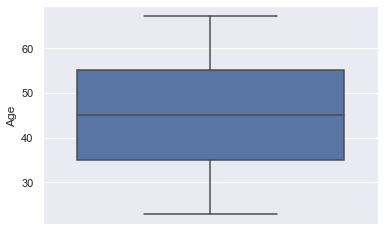

In [38]:
ax = sns.boxplot(y=df['Age'])

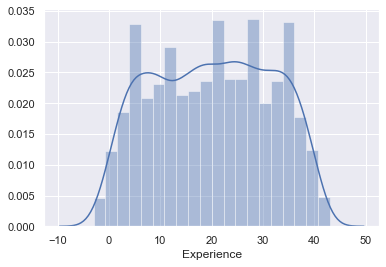

In [39]:
sns.distplot(df['Experience'])

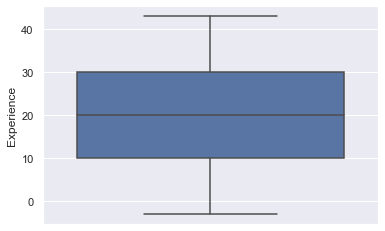

In [40]:
ax = sns.boxplot(y=df['Experience'])

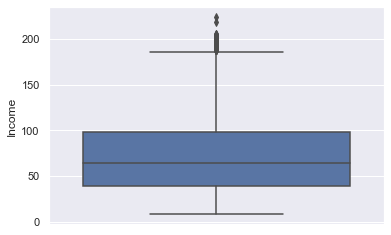

In [41]:
ax = sns.boxplot(y=df['Income'])

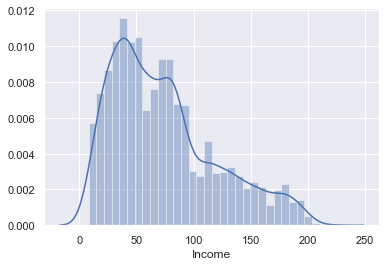

In [42]:
sns.distplot(df['Income'])

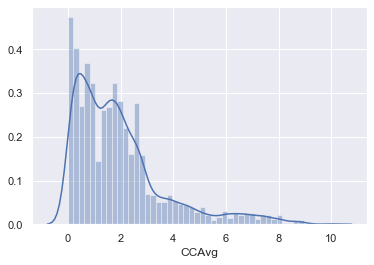

In [43]:
sns.distplot(df['CCAvg'])

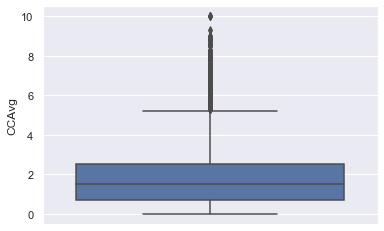

In [44]:
ax = sns.boxplot(y=df['CCAvg'])

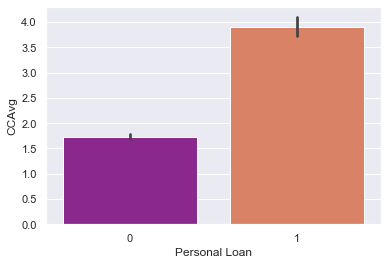

In [86]:
sns.barplot(x ='Personal Loan', y ='CCAvg', data = df,  
            palette ='plasma', estimator = np.mean)

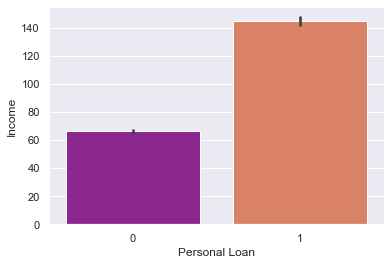

In [87]:
#Income v/s Personal Loan
sns.barplot(x ='Personal Loan', y ='Income', data = df,  
            palette ='plasma', estimator = np.mean)

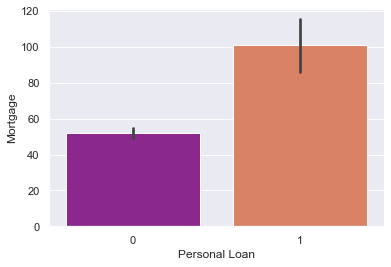

In [88]:
#Mortgage v/s Personal Loan
sns.barplot(x ='Personal Loan', y ='Mortgage', data = df,  
            palette ='plasma', estimator = np.mean)

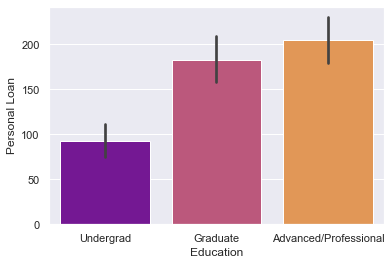

In [89]:
sns.barplot(y ='Personal Loan', x ='Education', data = df,  
            palette ='plasma', estimator = np.sum)

# Q3)Pairplot and Correlation

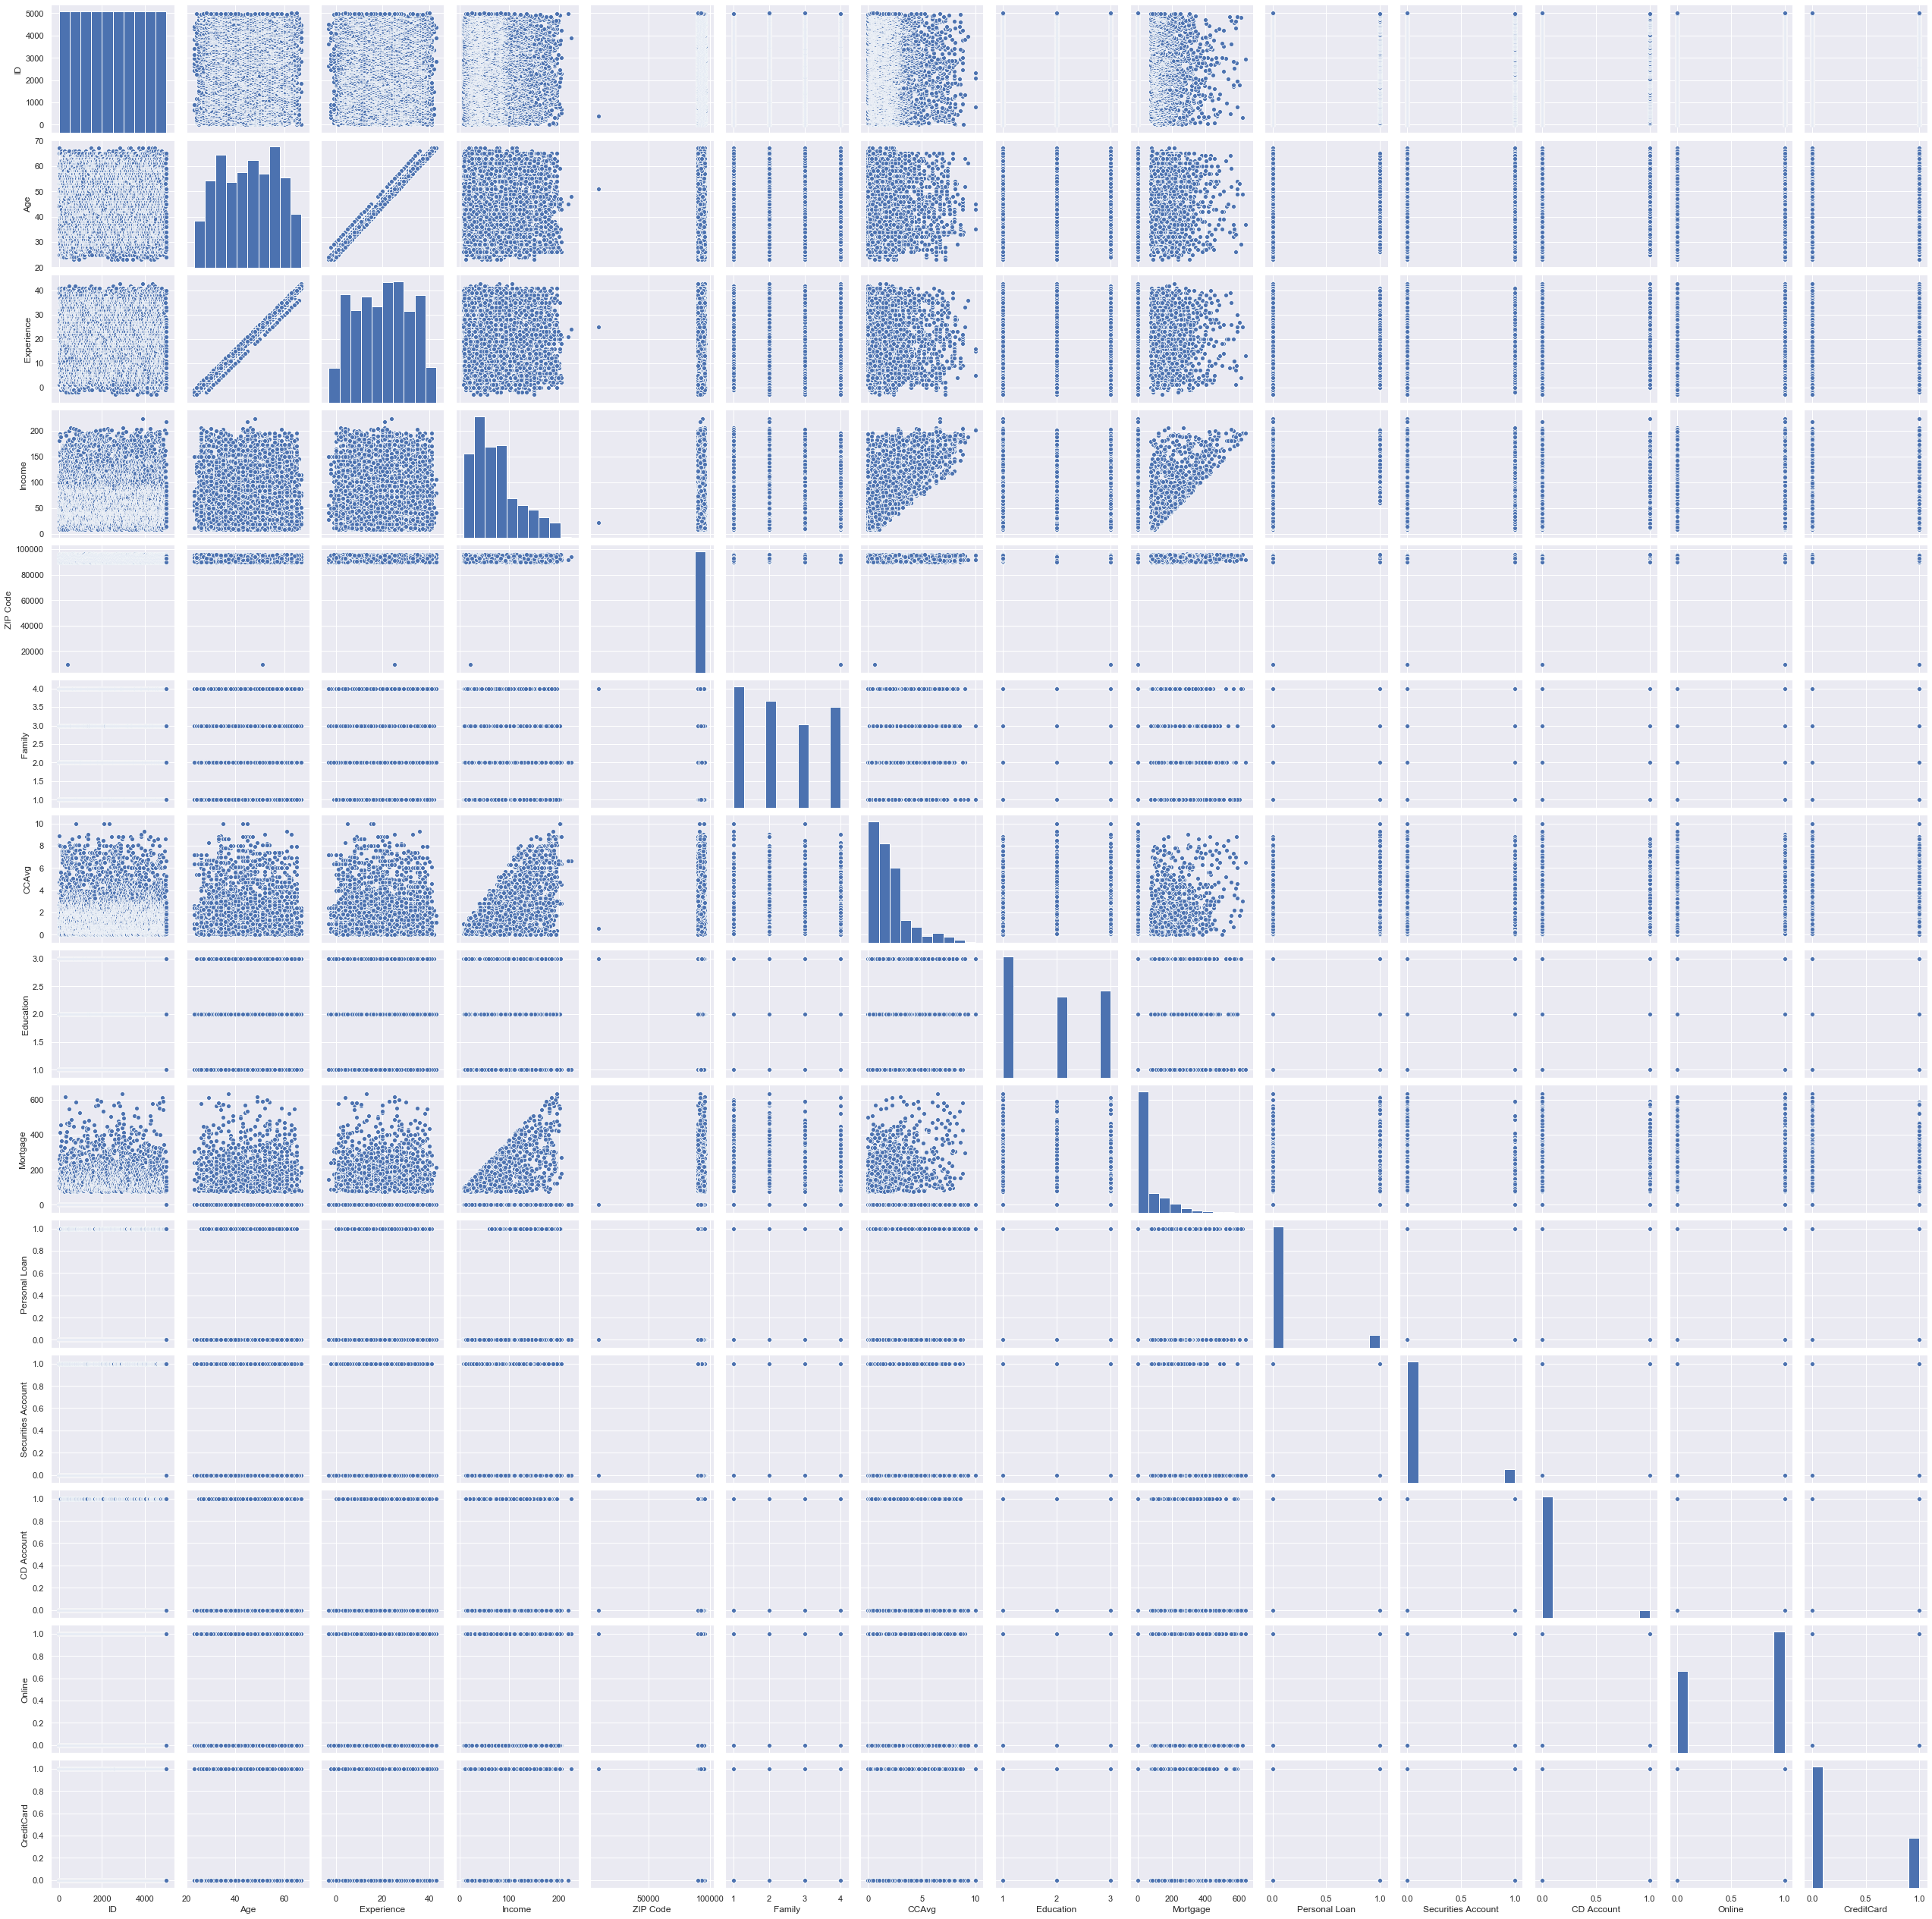

In [45]:
sns.pairplot(df) 

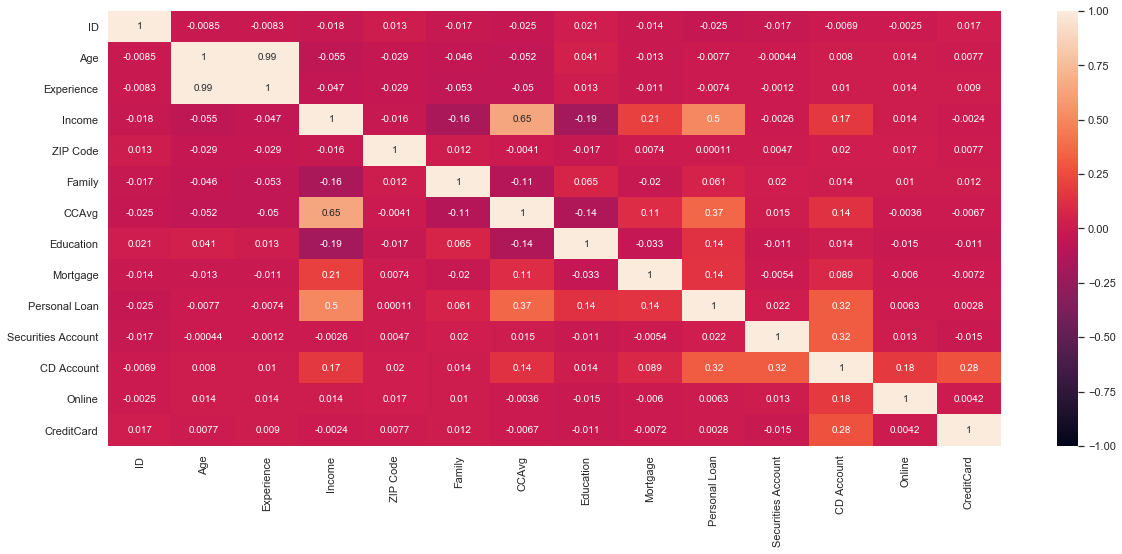

In [46]:
corr=df.corr() 
plt.figure(figsize=(20, 8))
sns.heatmap(corr,  vmax=1.0, vmin=-1.0, annot = True)


# Q4.Hot encoding for Education Variable

In [47]:
df['Education'] = df['Education'].replace({1:'Undergrad', 2:'Graduate', 3:'Advanced/Professional'})
df = pd.get_dummies(df,columns = ['Education'])


In [67]:
df.Family = df.Family.astype('object')
df['Securities Account']  = df['Securities Account'].astype('object')
df['CD Account'] = df['CD Account'].astype('object')
df['Online'] = df['Online'].astype('object')
df['CreditCard'] = df['CreditCard'].astype('object')

# Q5. Dataset split

In [68]:
X = df.drop('Personal Loan',axis=1)   # Independent variables

y = df['Personal Loan']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Q6.StandardScaler

In [70]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)

# Q7. Metrics function

In [71]:
def metric(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    model_score = model.score(X_test,y_test)
    model_confusion_matrix = confusion_matrix(y_test,y_predicted)
    print('\nConfusion Matrix =', model_confusion_matrix)
    conf_table = model_confusion_matrix
    acc = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
    pre = conf_table[0,0] / (conf_table[0,0] + conf_table[0,1])
    recall= conf_table[0,0] / (conf_table[0,0] + conf_table[1,0])
    f1 = (2 * pre * recall) / (pre + recall)
    print("Accuracy of accepting Loan           : ",round(acc,2))
    print("precision of accepting Loan          : ",round(pre,2))
    print("recall of accepting Loan             : ",round(recall,2))
    print("F1 score of accepting Loan           : ",round(f1,2))
    


# Q8. Different models

In [72]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
metric(logreg_model,X_train_std,X_test_std,y_train,y_test)



Confusion Matrix = [[1344   18]
 [  51   87]]
Accuracy of accepting Loan           :  0.95
precision of accepting Loan          :  0.99
recall of accepting Loan             :  0.96
F1 score of accepting Loan           :  0.97


In [90]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()

#fitting the model into training dataset
metric(gnb, X_train_std,X_test_std,y_train,y_test)


Confusion Matrix = [[1272   90]
 [  51   87]]
Accuracy of accepting Loan           :  0.91
precision of accepting Loan          :  0.93
recall of accepting Loan             :  0.96
F1 score of accepting Loan           :  0.95


In [91]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model= KNeighborsClassifier(n_neighbors=3) #taking k=3

metric(kNN_model, X_train_std,X_test_std,y_train,y_test)


Confusion Matrix = [[1357    5]
 [  60   78]]
Accuracy of accepting Loan           :  0.96
precision of accepting Loan          :  1.0
recall of accepting Loan             :  0.96
F1 score of accepting Loan           :  0.98


# Q9. Comparing different models

In [92]:
data= {'Model':['Logistic Regression', 'Naive Bayes', 'kNN'], 'Accuracy':['0.95','0.91','0.96'], 
            'Recall':['0.96','0.96','0.96'], 'Precision':['0.99','0.93','1.0'], 'F1-Score':['0.97','0.95','0.98']}

metric_df= pd.DataFrame(data)
print(metric_df)

                 Model Accuracy Recall Precision F1-Score
0  Logistic Regression     0.95   0.96      0.99     0.97
1          Naive Bayes     0.91   0.96      0.93     0.95
2                  kNN     0.96   0.96       1.0     0.98


# Q10. Comparing all the models KNN has the best F1 Score and has the best precision.